In [ ]:
import pandas as pd

In [ ]:
ump_data = pd.read_csv("Salary.csv")

In [ ]:
ump_data.head()

,REGION,SALARY,YEAR
0,ACEH,128000,1997
1,SUMATERA UTARA,151000,1997
2,SUMATERA BARAT,119000,1997
3,RIAU,151500,1997
4,JAMBI,119500,1997


In [ ]:
ump_data.describe()

,SALARY,YEAR
count,8.700000e+02,870.000000
mean,1.179872e+06,2009.816092
std,9.175435e+05,7.453930
min,1.060000e+05,1997.000000
25%,4.215000e+05,2003.000000
50%,8.903875e+05,2010.000000
75%,1.867583e+06,2016.000000
max,4.452724e+06,2022.000000


In [ ]:
ump_data.isnull().sum()

REGION    0
SALARY    0
YEAR      0
dtype: int64

In [ ]:
ump_data.duplicated().any()

False

In [ ]:
ump_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   REGION  870 non-null    category
 1   SALARY  870 non-null    int64   
 2   YEAR    870 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 15.9 KB


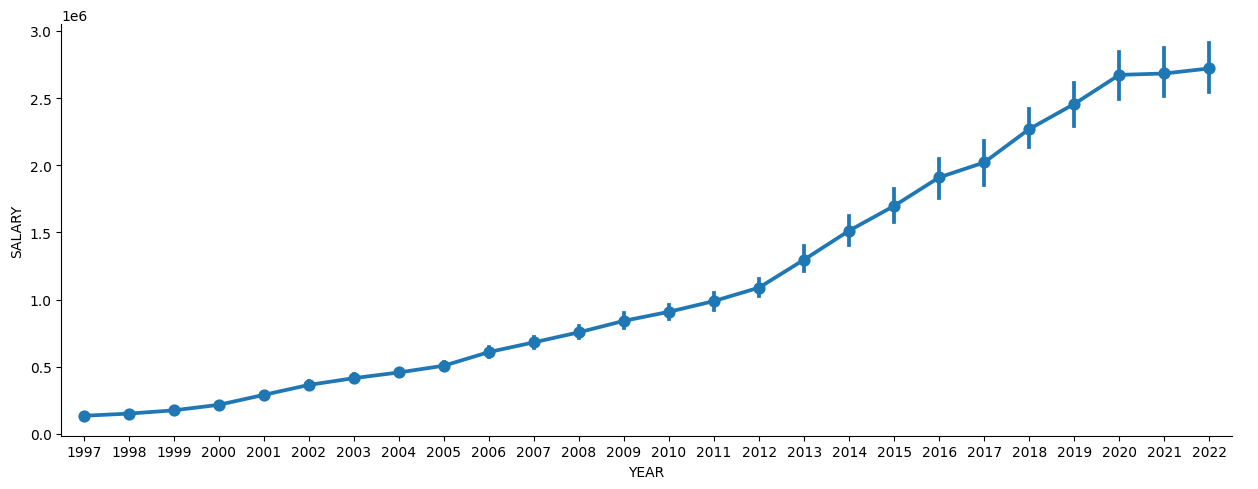

In [ ]:
import seaborn as sns
sns.catplot(x='YEAR', y='SALARY', data=ump_data, kind='point', aspect=2.5)

In [ ]:
avg=ump_data.groupby(["YEAR"]).mean().reset_index()
avg.head()

<ipython-input-21-1c1c4cefb8a3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg=ump_data.groupby(["YEAR"]).mean().reset_index()


,YEAR,SALARY
0,1997,134964.285714
1,1998,150937.500000
2,1999,175390.625000
3,2000,216506.250000
4,2001,290487.500000


In [ ]:
growth=[0]
for i in range(1,26):
    growth.append(avg["SALARY"][i]-avg["SALARY"][i-1])

avg["growth"]=growth
avg.head()

,YEAR,SALARY,growth
0,1997,134964.285714,0.000000
1,1998,150937.500000,15973.214286
2,1999,175390.625000,24453.125000
3,2000,216506.250000,41115.625000
4,2001,290487.500000,73981.250000


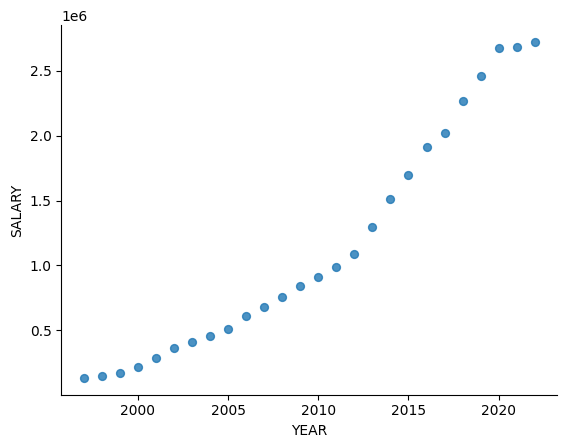

In [ ]:
# @title YEAR vs SALARY

from matplotlib import pyplot as plt
avg.plot(kind='scatter', x='YEAR', y='SALARY', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

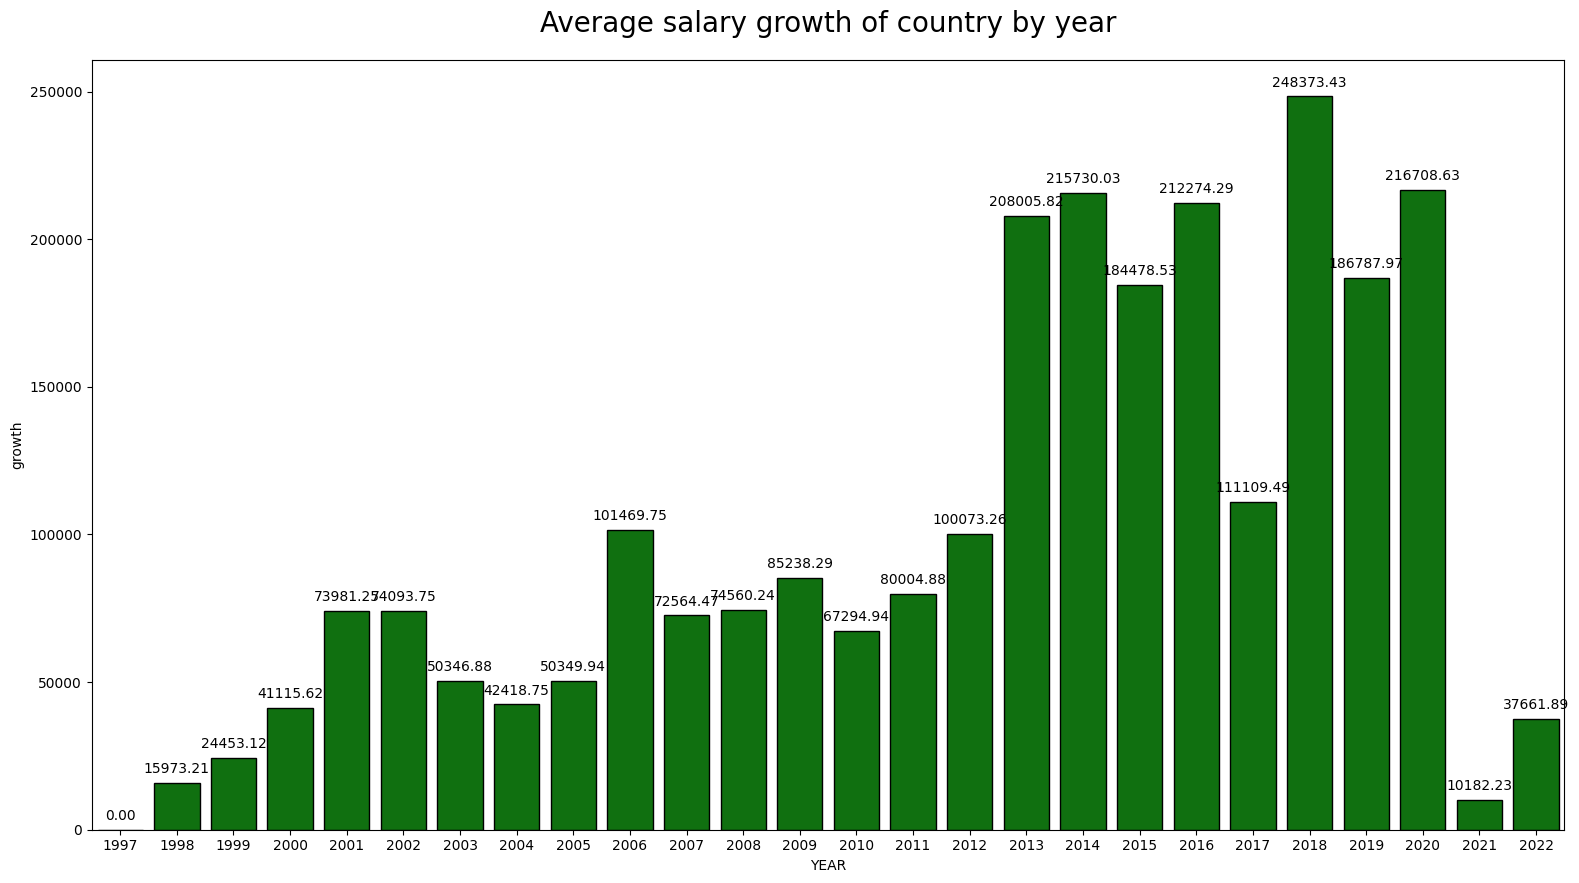

In [ ]:
plt.figure(figsize=(19,10))
plt.title("Average salary growth of country by year", size=20, pad=20)

ax = sns.barplot(x='YEAR', y='growth', data=avg, color='green', edgecolor="black")

# loop through each bar and annotate
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()

<ipython-input-41-77947b5da24b>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph.set_xticklabels(graph.get_xticklabels(),rotation=90)


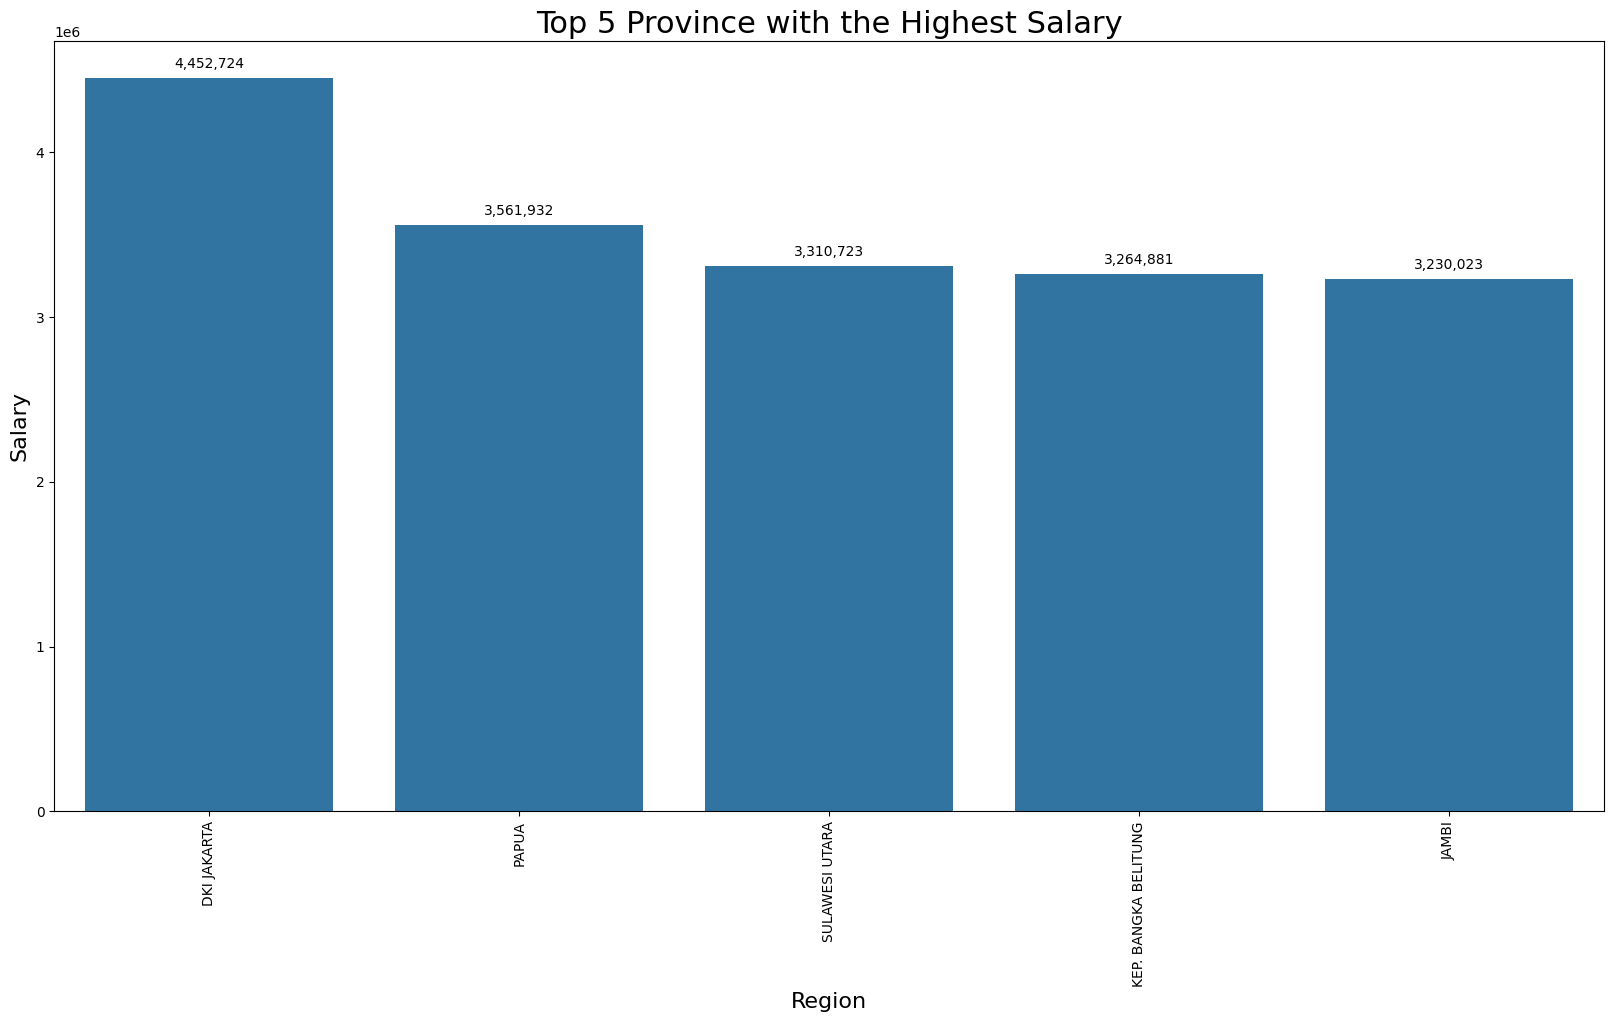

In [ ]:
 #ambil 5 region dengan salary tertinggi
top_5_regions = salary.groupby('REGION')['SALARY'].max().sort_values(ascending=False)[:5]
top_5_regions = top_5_regions.reset_index()

plt.figure(figsize = (20, 10))
graph = sns.barplot(x = 'REGION', y = 'SALARY', data=top_5_regions, order=top_5_regions['REGION'])
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
plt.xlabel('Region', fontsize=16)
plt.ylabel('Salary', fontsize=16)
plt.title('Top 5 Province with the Highest Salary', fontsize=22)

for index, row in top_5_regions.iterrows():
    graph.annotate(format(int(row['SALARY']), ','),
                   (row.name, row['SALARY']),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

In [ ]:
from sklearn.linear_model import LinearRegression

ump_data = ump_data.reset_index(drop=True).groupby('REGION').apply(lambda x: x.sort_values('YEAR'))

models = {}
for provinsi in ump_data['REGION'].unique():
    X = ump_data.loc[ump_data['REGION'] == provinsi]['YEAR'].values.reshape(-1, 1)
    y = ump_data.loc[ump_data['REGION'] == provinsi]['SALARY'].values.reshape(-1, 1)
    model = LinearRegression().fit(X, y)
    models[provinsi] = model



<ipython-input-157-7c763827e0a6>:3: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



In [ ]:
future_years = np.array(range(ump_data['YEAR'].max() + 1, ump_data['YEAR'].max() + 11))
future_ump = []
for provinsi in ump_data['REGION'].unique():
    model = models[provinsi]
    future_ump_provinsi = model.predict(future_years.reshape(-1, 1))
    future_ump.extend(future_ump_provinsi)

In [ ]:


future_df = pd.DataFrame({
    'REGION': np.repeat(ump_data['REGION'].unique(), 10),
    'YEAR': np.tile(range(ump_data['YEAR'].max() + 1, ump_data['YEAR'].max() + 11), ump_data['REGION'].nunique()),
    'SALARY': future_ump
})



In [ ]:
future_df['SALARY'] = future_df['SALARY'].astype(int)
future_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   REGION  350 non-null    category
 1   YEAR    350 non-null    int64   
 2   SALARY  350 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 7.3 KB


In [ ]:


combined_df = pd.concat([ump_data, future_df],axis=0,ignore_index=True)



In [ ]:
combined_df = pd.concat([ump_data, future_df],axis=0,ignore_index=True)

mse_list = []
rmse_list = []
r2_list = []
mae_list = []

for provinsi in ump_data['REGION'].unique():
    data_provinsi = combined_df.loc[combined_df['REGION'] == provinsi]
    X = data_provinsi[['YEAR']].values.reshape(-1, 1)
    y_true = data_provinsi['SALARY'].values.reshape(-1, 1)
    y_pred = models[provinsi].predict(X)

    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)

    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)
    mae_list.append(mae)

print('MSE:', np.mean(mse_list))
print('RMSE:', np.mean(rmse_list))
print('R-squared:', np.mean(r2_list))
print('MAE:', np.mean(mae_list))

MSE: 39287683292.25046
RMSE: 186688.0825199329
R-squared: 0.9724572263357507
MAE: 133322.5143592025


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

ump_data = ump_data.reset_index(drop=True).groupby('REGION').apply(lambda x: x.sort_values('YEAR'))

models = {}
for provinsi in ump_data['REGION'].unique():
    X = ump_data.loc[ump_data['REGION'] == provinsi]['YEAR'].values.reshape(-1, 1)
    y = ump_data.loc[ump_data['REGION'] == provinsi]['SALARY'].values.reshape(-1, 1)

    # Create a polynomial feature matrix
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)

    # Fit the polynomial regression model
    model = LinearRegression().fit(X_poly, y)
    models[provinsi] = model

<ipython-input-164-1ea1659bd124>:3: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



In [ ]:
future_years = np.array(range(ump_data['YEAR'].max() + 1, ump_data['YEAR'].max() + 11))
future_ump = []
for provinsi in ump_data['REGION'].unique():
    model = models[provinsi]
    X_poly = poly.fit_transform(future_years.reshape(-1, 1))
    future_ump_provinsi = model.predict(X_poly)
    future_ump.extend(future_ump_provinsi)

In [ ]:
future_df = pd.DataFrame({
    'REGION': np.repeat(ump_data['REGION'].unique(), 10),
    'YEAR': np.tile(range(ump_data['YEAR'].max() + 1, ump_data['YEAR'].max() + 11), ump_data['REGION'].nunique()),
    'SALARY': future_ump
})

In [ ]:
future_df['SALARY'] = future_df['SALARY'].astype(int)
future_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   REGION  350 non-null    category
 1   YEAR    350 non-null    int64   
 2   SALARY  350 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 7.3 KB


In [ ]:
combined_df = pd.concat([ump_data, future_df],axis=0,ignore_index=True)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_true = combined_df.loc[combined_df['YEAR'] <= 2020]['SALARY'].values.reshape(-1, 1)
y_pred = combined_df.loc[combined_df['YEAR'] <= 2020]['SALARY'].values.reshape(-1, 1)

mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

Mean Squared Error: 0.0
R^2 Score: 1.0


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220 entries, 0 to 1219
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   REGION  1220 non-null   category
 1   SALARY  1220 non-null   int64   
 2   YEAR    1220 non-null   int64   
dtypes: category(1), int64(2)
memory usage: 21.7 KB


In [ ]:
combined_df.head()

,REGION,SALARY,YEAR
0,ACEH,128000,1997
1,SUMATERA UTARA,151000,1997
2,SUMATERA BARAT,119000,1997
3,RIAU,151500,1997
4,JAMBI,119500,1997


In [ ]:
combined_df.to_csv('ump_data_combined.csv', index=False)

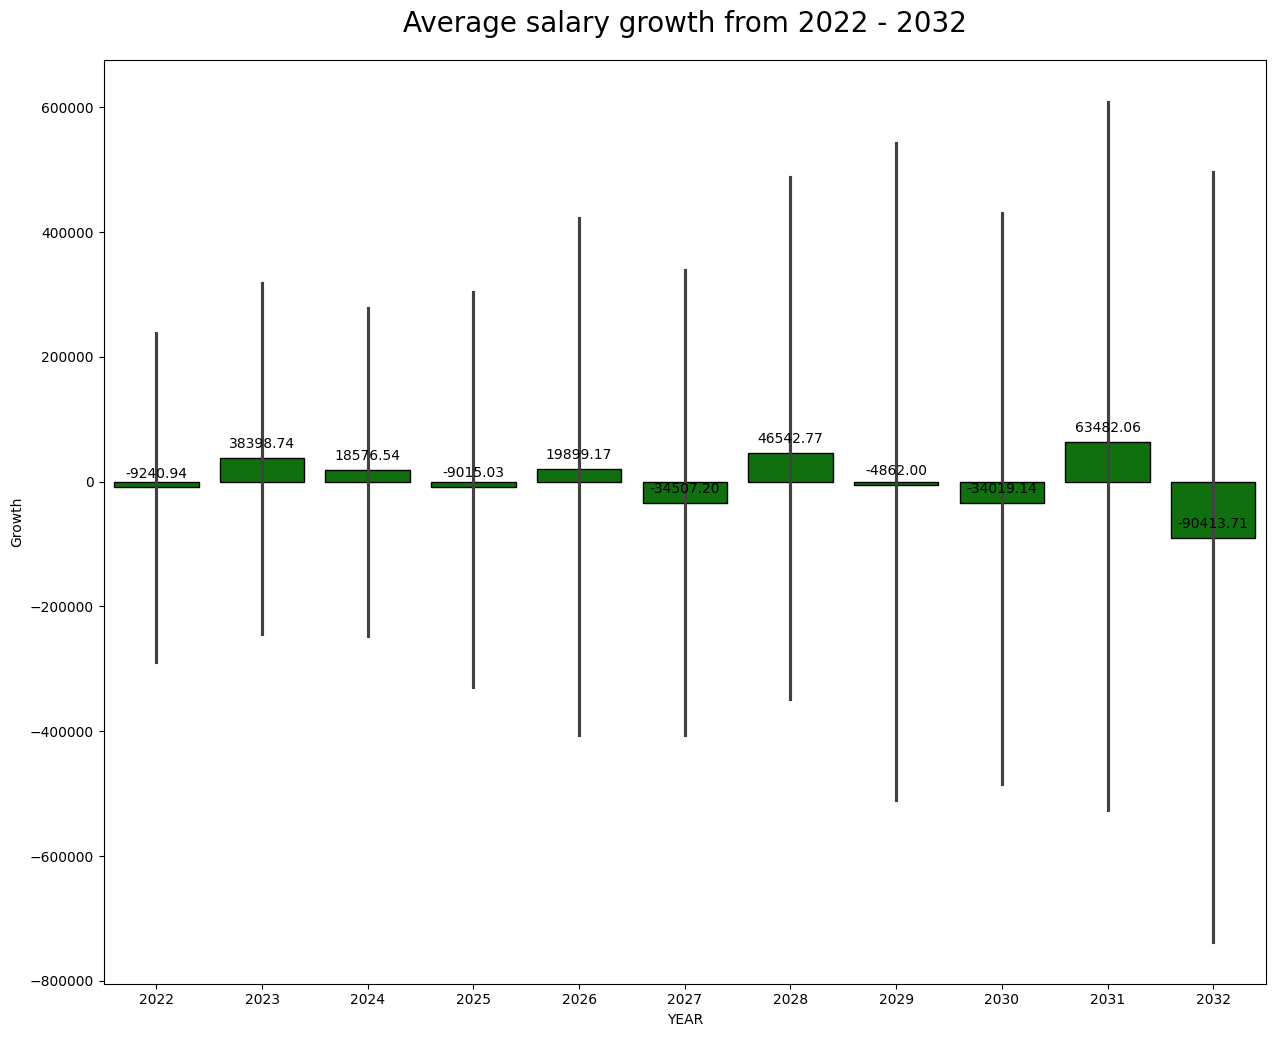

In [ ]:
import seaborn as sns

AVG = combined_df.sort_values(by='YEAR', ascending=True)

AVG['Growth'] = [0] + [AVG['SALARY'].iloc[i] - AVG['SALARY'].iloc[i-1] for i in range(1, len(AVG))]

plt.figure(figsize=(15,12))
plt.title("Average salary growth from 2022 - 2032", size=20, pad=20)

AVG_filtered = AVG.query('YEAR >= 2022 and YEAR <= 2032')

ax = sns.barplot(x='YEAR', y='Growth', data=AVG_filtered, color='green', edgecolor="black")

# loop through each bar and annotate
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()


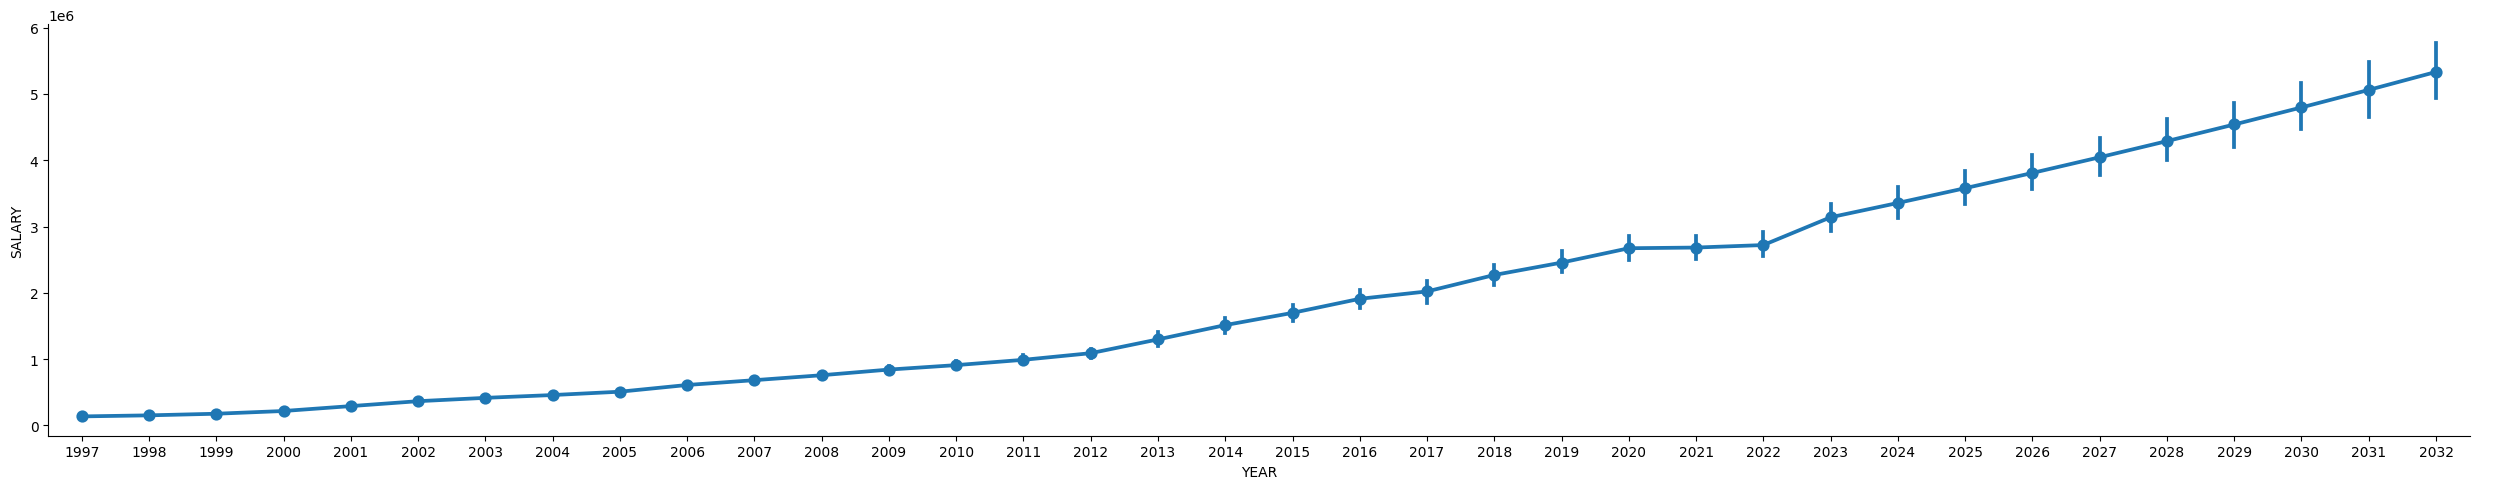

In [ ]:
sns.catplot(x='YEAR', y='SALARY', data=combined_df, kind='point', aspect=5)

In [ ]:
import plotly.express as px

fig = px.bar(combined_df, x='REGION', y="SALARY",color="REGION",
  animation_frame="YEAR", range_y=[0,7000000])
fig.show()

<ipython-input-71-a501545e7c01>:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



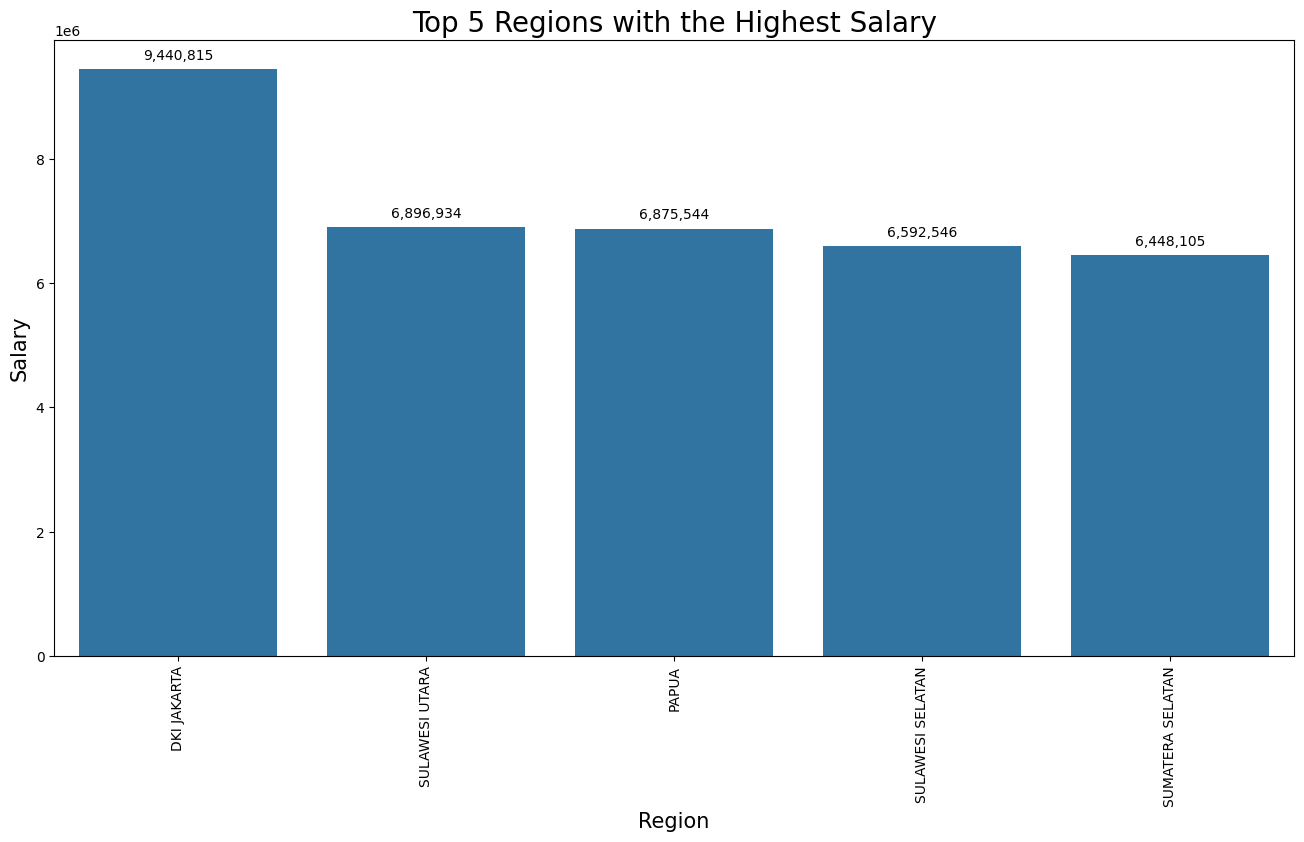

In [ ]:


# ambil 5 region dengan salary tertinggi
top_5_regions = combined_df.groupby('REGION')['SALARY'].max().sort_values(ascending=False)[:5]
top_5_regions = top_5_regions.reset_index()



plt.figure(figsize = (16, 8))
graph = sns.barplot(x = 'REGION', y = 'SALARY', data=top_5_regions, order=top_5_regions['REGION'])
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
plt.xlabel('Region', fontsize=15)
plt.ylabel('Salary', fontsize=15)
plt.title('Top 5 Regions with the Highest Salary', fontsize=20)

for index, row in top_5_regions.iterrows():
    graph.annotate(format(int(row['SALARY']), ','),
                   (row.name, row['SALARY']),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')



In [ ]:

import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Mengimpor data
ump_data = ump_data.loc[ump_data["REGION"] != "REGION"].reset_index(drop=True)
ump_data['REGION'] = ump_data['REGION'].astype('category')
ump_data['YEAR'] = ump_data['YEAR'].astype(int)
ump_data['SALARY'] = pd.to_numeric(ump_data['SALARY'], errors='coerce')

# Mengurutkan data berdasarkan wilayah dan tahun
ump_data = ump_data.groupby('REGION').apply(lambda x: x.sort_values('YEAR')).reset_index(drop=True)

# Inisialisasi model dictionary
models = {}

# Proses pelatihan model untuk setiap wilayah
for region in ump_data['REGION'].unique():
    X_region = ump_data.loc[ump_data['REGION'] == region, 'YEAR'].values.reshape(-1, 1)
    y_region = ump_data.loc[ump_data['REGION'] == region, 'SALARY'].values.reshape(-1, 1)

    # Memisahkan data menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X_region, y_region, test_size=0.2, random_state=42)

    # Membuat fitur polinomial
    poly = PolynomialFeatures(degree=2)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    # Membuat dan melatih model regresi polinomial
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Menyimpan model dalam dictionary
    models[region] = {
        'model': model,
        'poly_features': poly
    }

    # Menguji model pada data uji dan mencetak matriks evaluasi
    y_pred = model.predict(X_poly_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"Wilayah: {region}")
    print(f"R-squared: {r2}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print()




<ipython-input-3-ce3d460fa0a8>:14: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ump_data = ump_data.groupby('REGION').apply(lambda x: x.sort_values('YEAR')).reset_index(drop=True)


Wilayah: ACEH
R-squared: 0.9951001381291725
Mean Squared Error (MSE): 4616226675.238341
Root Mean Squared Error (RMSE): 67942.81915874805

Wilayah: SUMATERA UTARA
R-squared: 0.9976259571056614
Mean Squared Error (MSE): 1331176561.0882118
Root Mean Squared Error (RMSE): 36485.29239417182

Wilayah: SUMATERA BARAT
R-squared: 0.9987749928259055
Mean Squared Error (MSE): 709401239.7308604
Root Mean Squared Error (RMSE): 26634.5872829083

Wilayah: RIAU
R-squared: 0.9972151306651066
Mean Squared Error (MSE): 2425229240.291508
Root Mean Squared Error (RMSE): 49246.61653648409

Wilayah: JAMBI
R-squared: 0.9566796881236108
Mean Squared Error (MSE): 45782632800.25557
Root Mean Squared Error (RMSE): 213968.765945536

Wilayah: SUMATERA SELATAN
R-squared: 0.9930577477758485
Mean Squared Error (MSE): 6630934438.379776
Root Mean Squared Error (RMSE): 81430.54978556743

Wilayah: BENGKULU
R-squared: 0.9268988643351947
Mean Squared Error (MSE): 61155663516.25217
Root Mean Squared Error (RMSE): 247296.711

In [ ]:
# Prediksi gaji untuk 10 tahun ke depan
future_years = np.array(range(ump_data['YEAR'].max() + 1, ump_data['YEAR'].max() + 11))
future_predictions = []

for region in ump_data['REGION'].unique():
    model = models[region]['model']
    poly_features = models[region]['poly_features']
    X_poly_future = poly_features.transform(future_years.reshape(-1, 1))
    future_ump_region = model.predict(X_poly_future)
    future_predictions.extend(future_ump_region)

In [ ]:
# Membuat DataFrame untuk gaji masa depan
future_df = pd.DataFrame({
    'REGION': np.repeat(ump_data['REGION'].unique(), 10),
    'YEAR': np.tile(range(ump_data['YEAR'].max() + 1, ump_data['YEAR'].max() + 11), ump_data['REGION'].nunique()),
    'SALARY': future_predictions
})


In [ ]:
future_df['SALARY'] = future_df['SALARY'].astype(int)
future_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   REGION  350 non-null    category
 1   YEAR    350 non-null    int64   
 2   SALARY  350 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 7.3 KB


In [ ]:
future_df.head(350)

In [ ]:
future_df.to_csv('future_data.csv', index=False)

In [ ]:
# Menggabungkan data pelatihan dan data gaji masa depan
combined_df = pd.concat([ump_data, future_df], axis=0, ignore_index=True)

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220 entries, 0 to 1219
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   REGION  1220 non-null   category
 1   SALARY  1220 non-null   object  
 2   YEAR    1220 non-null   int64   
dtypes: category(1), int64(1), object(1)
memory usage: 21.7+ KB


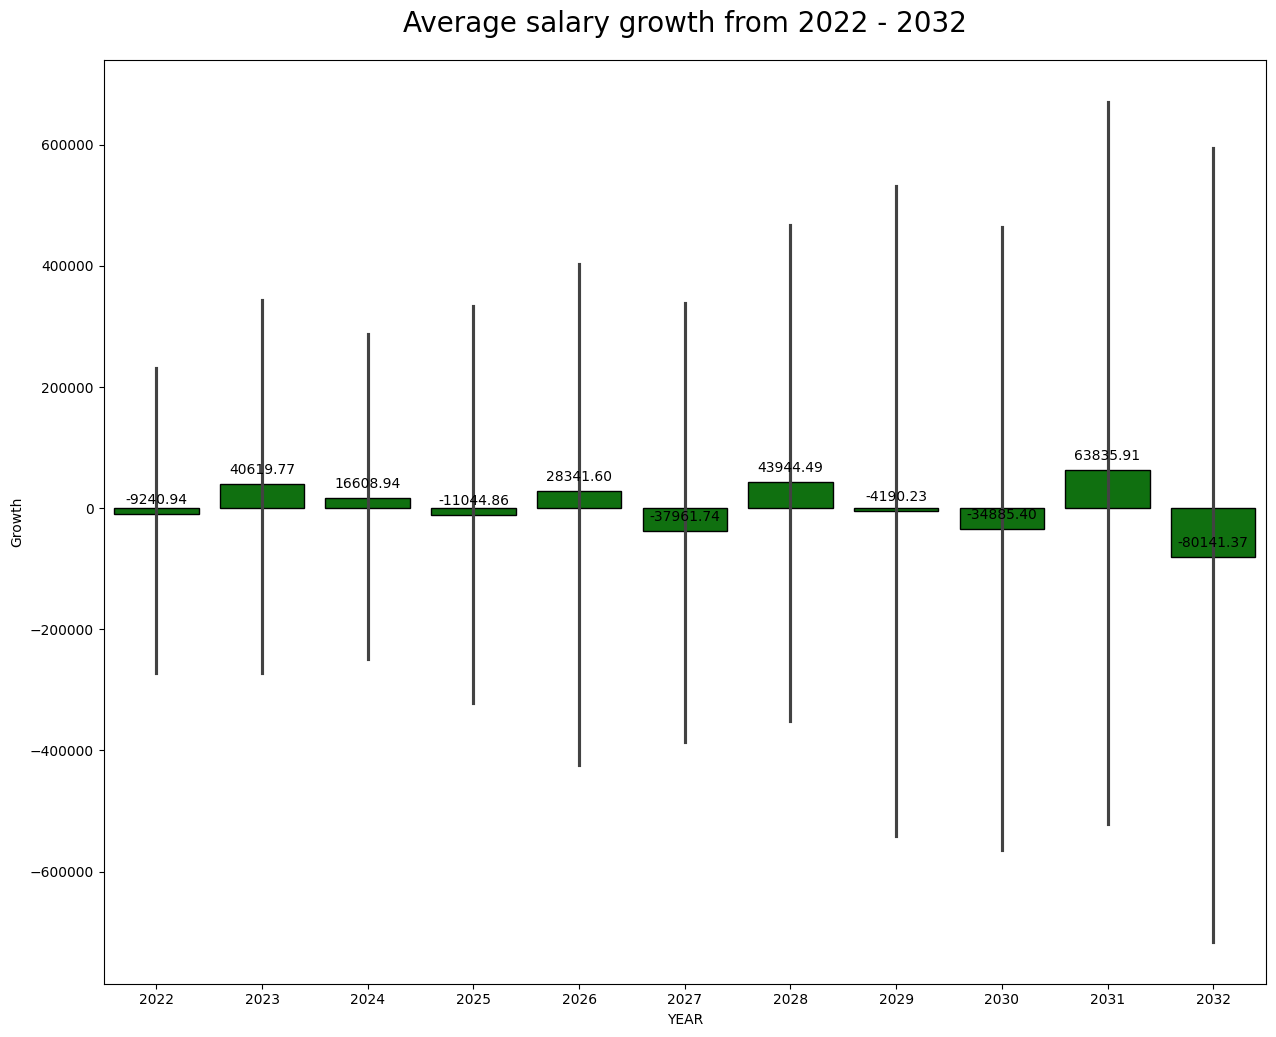

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sorting the DataFrame by 'YEAR' in ascending order
AVG = combined_df.sort_values(by='YEAR', ascending=True)

# Calculate the growth of salary
AVG['Growth'] = AVG['SALARY'].diff()

# Setting the first value of 'Growth' to 0
AVG.loc[AVG.index[0], 'Growth'] = 0

# Plotting the bar plot
plt.figure(figsize=(15, 12))
plt.title("Average salary growth from 2022 - 2032", size=20, pad=20)

AVG_filtered = AVG.query('YEAR >= 2022 and YEAR <= 2032')

ax = sns.barplot(x='YEAR', y='Growth', data=AVG_filtered, color='green', edgecolor="black")

# Loop through each bar and annotate
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()


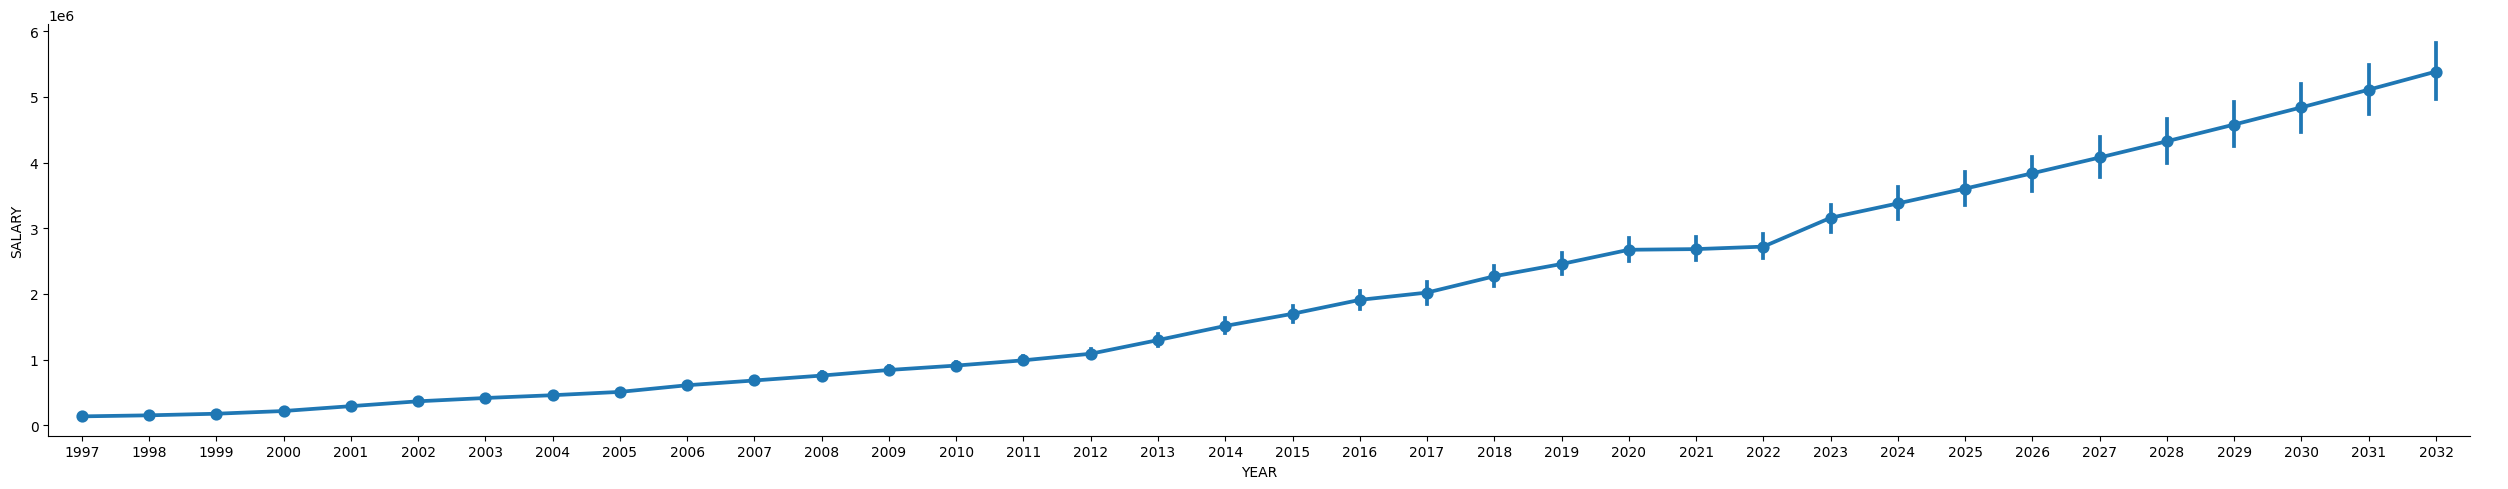

In [ ]:
sns.catplot(x='YEAR', y='SALARY', data=combined_df, kind='point', aspect=5)

In [ ]:
import plotly.express as px

fig = px.bar(combined_df, x='REGION', y="SALARY",color="REGION",
  animation_frame="YEAR", range_y=[0,7000000])
fig.show()

<ipython-input-191-a501545e7c01>:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



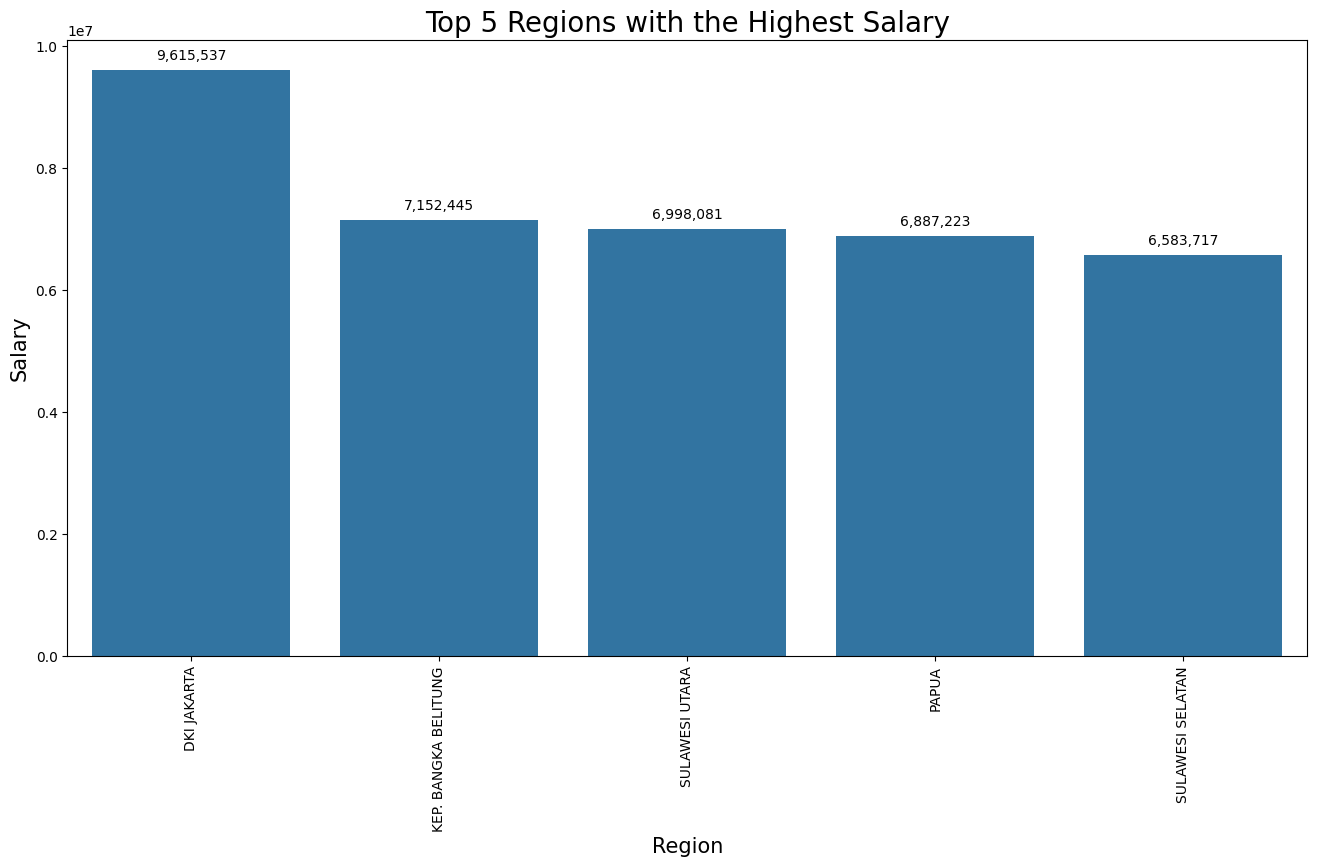

In [ ]:


# ambil 5 region dengan salary tertinggi
top_5_regions = combined_df.groupby('REGION')['SALARY'].max().sort_values(ascending=False)[:5]
top_5_regions = top_5_regions.reset_index()



plt.figure(figsize = (16, 8))
graph = sns.barplot(x = 'REGION', y = 'SALARY', data=top_5_regions, order=top_5_regions['REGION'])
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
plt.xlabel('Region', fontsize=15)
plt.ylabel('Salary', fontsize=15)
plt.title('Top 5 Regions with the Highest Salary', fontsize=20)

for index, row in top_5_regions.iterrows():
    graph.annotate(format(int(row['SALARY']), ','),
                   (row.name, row['SALARY']),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

